In [1]:
import time
now = time.time()

In [49]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [30]:
train_dataset = pd.read_csv('DataSets/DatasetsCreated/train_dataset.csv')
train_dataset.shape

(1656689, 53)

In [31]:
test_dataset = pd.read_csv('DataSets/DatasetsCreated/test_dataset.csv')
test_dataset.shape

(113640, 48)

## Categorical Data

In [32]:
# categorical_features = ['Tag', 'Purchaser', 'Merchant_Popular']
# for feature in categorical_features:
#     train_dataset[feature] = pd.Categorical(train_dataset[feature])

# One Hot Encoding
train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['Tag'], prefix='Tag',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)
test_dataset = pd.concat([test_dataset,pd.get_dummies(test_dataset['Tag'], prefix='Tag',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)

# train_dataset = pd.concat([train_dataset,pd.get_dummies(train_dataset['DayOfWeek'], prefix='DayOfWeek',prefix_sep='_', drop_first=True,dummy_na=False)],axis=1)


In [33]:
train_dataset.columns

Index(['User_id', 'Merchant_id', 'Action', 'Coupon_id', 'Discount_rate',
       'Date_received', 'Date', 'Count', 'Discount', 'Original_price',
       'Discounted_price', 'Rate', 'Distance', 'Tag', 'User_Released',
       'User_Redeemed', 'User_Ratio', 'User_Buys', 'Purchaser',
       'UserMerchantCount', 'DayList', 'Merchant_Redeemed', 'Merchant_Ratio',
       'Merchant_AvgDistance', 'Merchant_Popular', 'Merchant_AvgRate',
       'MerchantDuration', 'AvgDailyUsers', 'VisitList', 'UniqueUsersCount',
       'MerchantRedemptionList', 'Coupon_Released', 'Coupon_Redeemed',
       'Coupon_Ratio', 'Duration', 'RedemptionList', 'ReleasesCount', 'ImpDay',
       'Weekend', 'DayOfWeek', 'Visits', 'User_Merchant_Ratio',
       'Merchant_User_Visit', 'DateTrack', 'First_day', 'DayNum',
       'LastUserVisit', 'LastRedemption', 'LastMerchantVisit',
       'LastMerchantRedemption', 'LastMerchantUserVisit', 'RedemptionDuration',
       'Target', 'Tag_1', 'Tag_2'],
      dtype='object')

In [36]:
 if 'Tag_1.0' in test_dataset.columns:
        test_dataset = test_dataset.rename(columns={'Tag_1.0':'Tag_1','Tag_2.0':'Tag_2'})
test_dataset.columns

Index(['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate', 'Distance',
       'Date_received', 'Discount', 'Original_price', 'Discounted_price',
       'Rate', 'Tag', 'User_Released', 'User_Redeemed', 'User_Ratio',
       'User_Buys', 'Purchaser', 'UserMerchantCount', 'DayList',
       'Merchant_Redeemed', 'Merchant_Ratio', 'Merchant_AvgDistance',
       'Merchant_Popular', 'Merchant_AvgRate', 'MerchantDuration',
       'AvgDailyUsers', 'VisitList', 'UniqueUsersCount',
       'MerchantRedemptionList', 'Coupon_Released', 'Coupon_Redeemed',
       'Coupon_Ratio', 'Duration', 'RedemptionList', 'ReleasesCount', 'ImpDay',
       'Weekend', 'DayOfWeek', 'Visits', 'User_Merchant_Ratio',
       'Merchant_User_Visit', 'DateTrack', 'First_day', 'DayNum',
       'LastUserVisit', 'LastRedemption', 'LastMerchantVisit',
       'LastMerchantRedemption', 'LastMerchantUserVisit', 'Tag_1', 'Tag_2'],
      dtype='object')

## Final Features

In [38]:
remove_columns = ['User_id', 'Merchant_id', 'Coupon_id', 'Discount_rate','Discount','Date_received',
                  'Date','Count','RedemptionDuration','DayList','DateTrack','DayNum','First_day',
                  'RedemptionList','VisitList', 'Merchant_User_Visit', 'MerchantRedemptionList','Tag']
unimportant_features = ['DayOfWeek','Weekend','ImpDay','Merchant_Popular','Purchaser','Action']
features = list(set(train_dataset.columns)-set(remove_columns)-set(['Target'])-set(unimportant_features))
print('Features to be included:'+str(len(features)))                  
print(features)

Features to be included:30
['MerchantDuration', 'Visits', 'Coupon_Ratio', 'LastMerchantVisit', 'Merchant_Ratio', 'Duration', 'Tag_1', 'AvgDailyUsers', 'Coupon_Redeemed', 'LastMerchantRedemption', 'User_Buys', 'LastRedemption', 'Discounted_price', 'ReleasesCount', 'Coupon_Released', 'User_Released', 'LastMerchantUserVisit', 'Merchant_Redeemed', 'LastUserVisit', 'Merchant_AvgRate', 'User_Ratio', 'Original_price', 'UniqueUsersCount', 'Tag_2', 'Rate', 'User_Merchant_Ratio', 'UserMerchantCount', 'Distance', 'Merchant_AvgDistance', 'User_Redeemed']


# Model

In [46]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from xgboost import XGBClassifier
from xgboost import plot_importance
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import xgboost as xgb
from sklearn.metrics import precision_score,recall_score


In [9]:
def save_model(model):
    #saving model
    from sklearn.externals import joblib 

    # Save the model as a pickle in a file 
    joblib.dump(model, 'Model/xgboost.pkl') 

    # Load the model from the file 
    clf_saved= joblib.load('Model/xgboost.pkl')  


In [10]:
y = list(train_dataset['Target'])
X = train_dataset[features]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=100)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.15, random_state=100)

### XGBoost

In [11]:
def train_model():
    
    clf = XGBClassifier(
     learning_rate =0.1,
     n_estimators=500,
     max_depth=5,
     min_child_weight=1,
     gamma=0,
     subsample=0.8,
     colsample_bytree=0.8,
     objective= 'binary:logistic',
     nthread=5,
     scale_pos_weight=1,
     seed=45,
     alpha=0.2)
    
    model = clf.fit(X_train, y_train)
    save_model(model)
    
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(15, 9)
    plt.show()

    return model

/Users/mahimaarora/opt/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


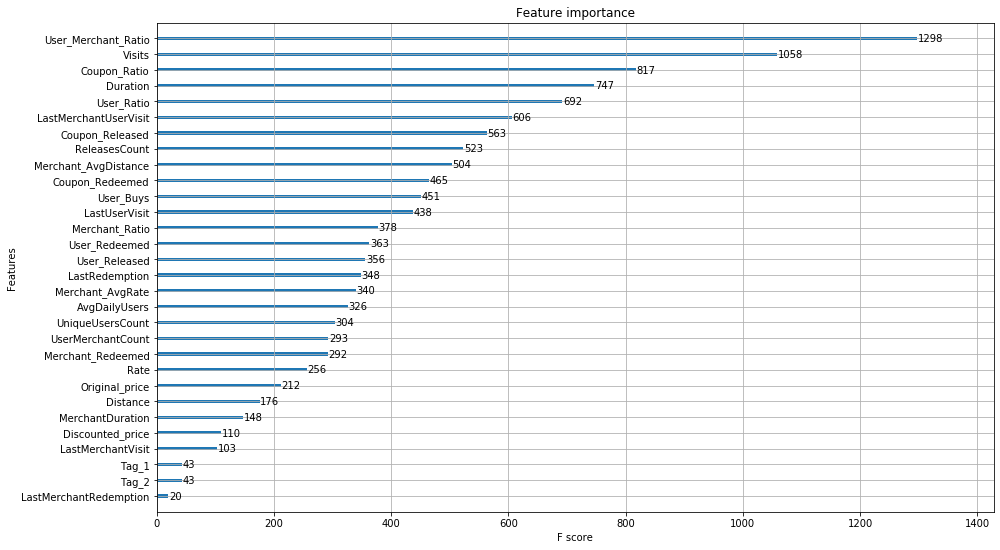

In [12]:
model = train_model()

In [13]:
# feature_importances = pd.DataFrame(model.feature_importances_,index = features,columns=['importance']).sort_values('importance',ascending=True)
# feature_importances.plot(kind='barh',figsize=(10,20))

In [53]:
def evaluate_model(X_check, y_check):
    
    
    predictions = (model.predict_proba(X_check)[:,1]).tolist()
    predicted_values = (model.predict(X_check)).tolist()
    test_dataset = pd.merge(X_check, train_dataset[['User_id','Merchant_id','Date_received']], how='left',left_index=True,right_index=True)
    output = test_dataset[['User_id','Merchant_id','Date_received']]
    output['Probabilities'] = predictions
    

    roc_score = round(roc_auc_score(y_check, predictions), 3)

    print('ROC AUC Score of Probailities:  '+ str(roc_score))
    print('ROC AUC Curve')
    fpr, tpr, _ = metrics.roc_curve(y_check, predictions)
    auc = metrics.roc_auc_score(y_check, predictions)
    plt.plot(fpr,tpr,label="auc="+str(auc))
    plt.legend(loc=4)
    plt.show()
    
    predicted_values = [1 if x>0.5 else 0 for x in predictions]
    print('______________________________________________________________________')
    print('\n The classification report for the model:')
    print(classification_report(y_check, predicted_values) )
    
    results = confusion_matrix(y_check, predicted_values) 
    print('______________________________________________________________________')
    print('\n The confusion matrix for the model:')
    print(results)
    print('______________________________________________________________________')
    

    
    threshold = np.arange(0,1,0.01)
    precision = np.zeros(len(threshold))
    recall = np.zeros(len(threshold))
    for i in range(len(threshold)):
        y1 = np.zeros(len(y_check),dtype=int)
        y1 = np.where(predictions<=threshold[i],0,1)
        precision[i] = precision_score(y_check,y1)
        recall[i] = recall_score(y_check,y1)

    plt.figure(figsize=(12,9))
    sns.set_style('whitegrid')
    sns.lineplot(x=threshold,y=precision)
    sns.lineplot(x=threshold,y=recall)
    plt.xlabel('Threshold')
    plt.title('Recall and Precision Values Vs Threshhold values')

    plt.show()
    
    return output
    

## Test Data Scores

ROC AUC Score of Probailities:  0.988
ROC AUC Curve


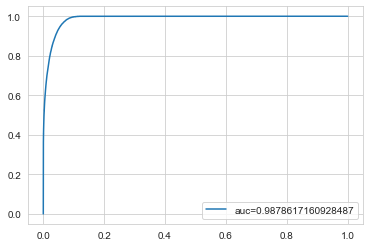

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    227865
           1       0.82      0.73      0.77     20639

    accuracy                           0.96    248504
   macro avg       0.90      0.86      0.88    248504
weighted avg       0.96      0.96      0.96    248504

______________________________________________________________________

 The confusion matrix for the model:
[[224483   3382]
 [  5479  15160]]
______________________________________________________________________


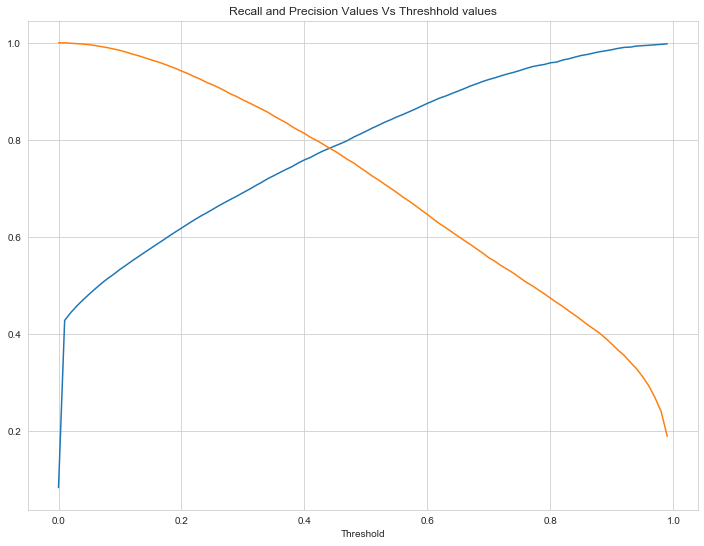

User_id  Merchant_id Date_received  Probabilities
1205261   4100357         3381    2016-01-24   1.131301e-07
163360    4897811        25104    2016-06-11   6.616291e-06
346634   11410832        14305    2016-02-22   4.466682e-07
1019622   2752033         6701    2016-01-19   2.393468e-01
963067    2343688          760    2016-01-29   2.505116e-07

In [54]:
test_output = evaluate_model(X_test, y_test)
test_output.head()

## Validation Data Scores

ROC AUC Score of Probailities:  0.988
ROC AUC Curve


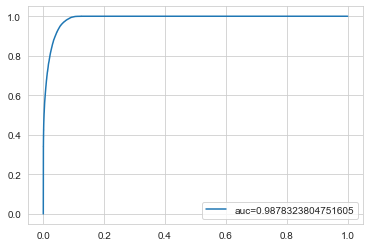

______________________________________________________________________

 The classification report for the model:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98    193459
           1       0.82      0.73      0.77     17769

    accuracy                           0.96    211228
   macro avg       0.90      0.86      0.88    211228
weighted avg       0.96      0.96      0.96    211228

______________________________________________________________________

 The confusion matrix for the model:
[[190617   2842]
 [  4803  12966]]
______________________________________________________________________


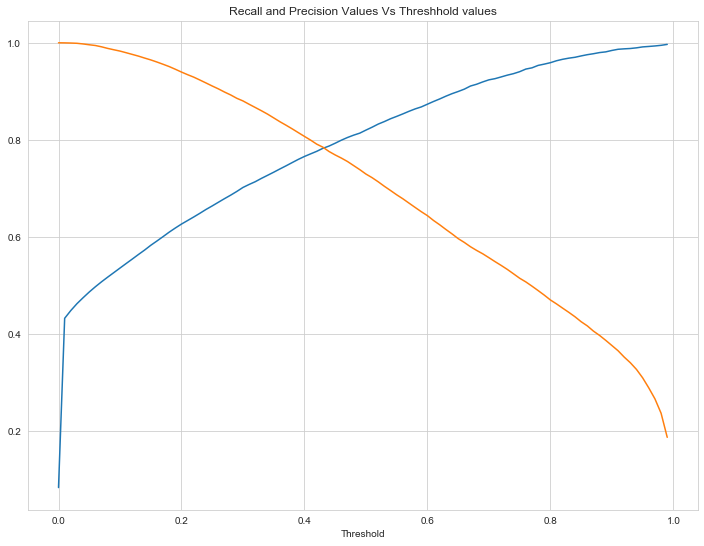

User_id  Merchant_id Date_received  Probabilities
13943      439064        15701    2016-03-22   1.465035e-05
1019873   2754287          760    2016-05-21   2.301088e-06
364413   11654699        40015    2016-02-26   1.129050e-04
1302851   4803632         2709    2016-01-27   2.458003e-07
1232964   4299205         2709    2016-01-25   2.751651e-07

In [55]:
val_output = evaluate_model(X_val, y_val)
val_output.head()

In [56]:
# def training2(train_dataset):
#     y = list(train_dataset['Target'])
#     X = train_dataset[features]
#     data_dmatrix = xgb.DMatrix(data=X, label=y)
#     params =  {'objective':'binary:logistic','colsample_bytree':0.8,'learning_rate':0.1,
#                 'max_depth':5}
#     cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,num_boost_round=50,
#                         early_stopping_rounds=10, as_pandas=True, seed=0,  metrics='auc') 
#     return cv_results
    
# training2(train_dataset)

# Test Dataset and Submission File

In [57]:
predictions = (model.predict_proba(test_dataset[features])[:,1]).tolist()
predicted_values = (model.predict(test_dataset[features])).tolist()
test = pd.merge(test_dataset[features], test_dataset[['User_id','Merchant_id','Date_received']]
                , how='left',left_index=True,right_index=True)
output = test[['User_id','Merchant_id','Date_received']]
output['Probability'] = [round(i, 6) for i in predictions]
output[output['Probability']>0.5]

User_id  Merchant_id Date_received  Probability
20      7333378         6901    2016-07-27     0.788710
178     2773771         7422    2016-07-25     0.825247
363     2762005         2206    2016-07-26     0.998647
408     2369815         5018    2016-07-02     0.994468
511     6879802         7221    2016-07-05     0.649259
...         ...          ...           ...          ...
113334  7121333         7397    2016-07-10     0.519108
113387  4644293         2436    2016-07-06     0.998970
113422  4532681         1469    2016-07-15     0.697365
113498  5467613         2635    2016-07-01     0.751105
113604  4478453         8131    2016-07-30     0.545384

[2726 rows x 4 columns]

# Execution Time of this notebook

In [ ]:
later = time.time()
difference = later - now
print('Time taken for the execution of this notebook: '+str(round(difference/60,2))+' mins')